In [119]:
import pandas as pd
import numpy as np
import os
import scipy.io

This notebook contains code for visualization of different variables and metrics as well as Principal Component Analysis

# Importing processed data

In [120]:
path = os.path.join( os.getcwd(), '../..', 'data/preprocessed_BMED8813/processed data/' )
filename = path+'TrainSet0501.csv'
trainSet = pd.read_csv(filename)
filename = path+'TestSet0501.csv'
testSet = pd.read_csv(filename)

## Identifying labels

In [121]:
Labels = ['death30', 'death60', 'death90', 'ICU', 'vent', 'anyCatastrophic','Admit30Days', 
          'Admit60Days', 'Admit90Days', 'Admit7Days','Admit14Days']

In [122]:
y_train = trainSet[Labels]
y_train = y_train.astype(int)
X_train = trainSet.drop(Labels,axis=1)
y_test = testSet[Labels]
y_test = y_test.astype(int)
X_test = testSet.drop(Labels,axis=1)

## Inspection of features selected by F-ANOVA score

In [123]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif)
results = selector.fit_transform(X_train, y_train.loc[:,Labels[3]])
features_ANOVA = X_train.loc[:,selector.scores_>100].columns.tolist()
display(features_ANOVA)

['AGEINYEARS',
 'HASHYPERTENSION',
 'MI',
 'CHF',
 'PVD',
 'STROKE',
 'PUD',
 'COPD',
 'DEMENTIA',
 'glucoseMedian',
 'glucoseLast',
 'plateletsLast',
 'GFRMedian',
 'GFRLast',
 'CreatinineMedian',
 'CreatinineLast',
 'countPriorAdmits',
 'LIVERDISEASE_0.0',
 'LIVERDISEASE_3.0',
 'DIABETES_0.0',
 'DIABETES_2.0',
 'KIDNEYDISEASE_0.0',
 'KIDNEYDISEASE_1.0',
 'KIDNEYDISEASE_3.0',
 'HEMIPLEGIA_0.0',
 'HEMIPLEGIA_1.0']

# Inspection of Creatinine Median Feature
Plotting distribution of variable per target group (positive vs negative ICU)

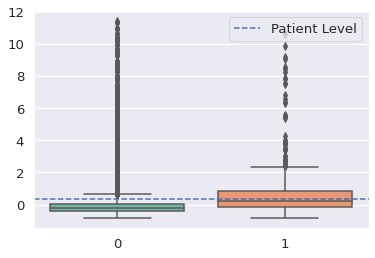

In [124]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

ICUtrain = X_train.loc[(y_train.ICU==1),:].copy()
ICUtrainlabels = y_train.loc[(y_train.ICU==1),:].copy()


ax = sns.boxplot(data=[X_train.loc[(y_train.loc[:,Labels[0]]==0),'CreatinineMedian'],X_train.loc[y_train.loc[:,Labels[0]]==1,'CreatinineMedian']],
            orient="v", palette="Set2")

ax.axhline(ICUtrain.loc[2,'CreatinineMedian'], ls='--', label= 'Patient Level')
ax.legend(loc='upper right')

## Plotting pearson correlation between selected features and ICU admission

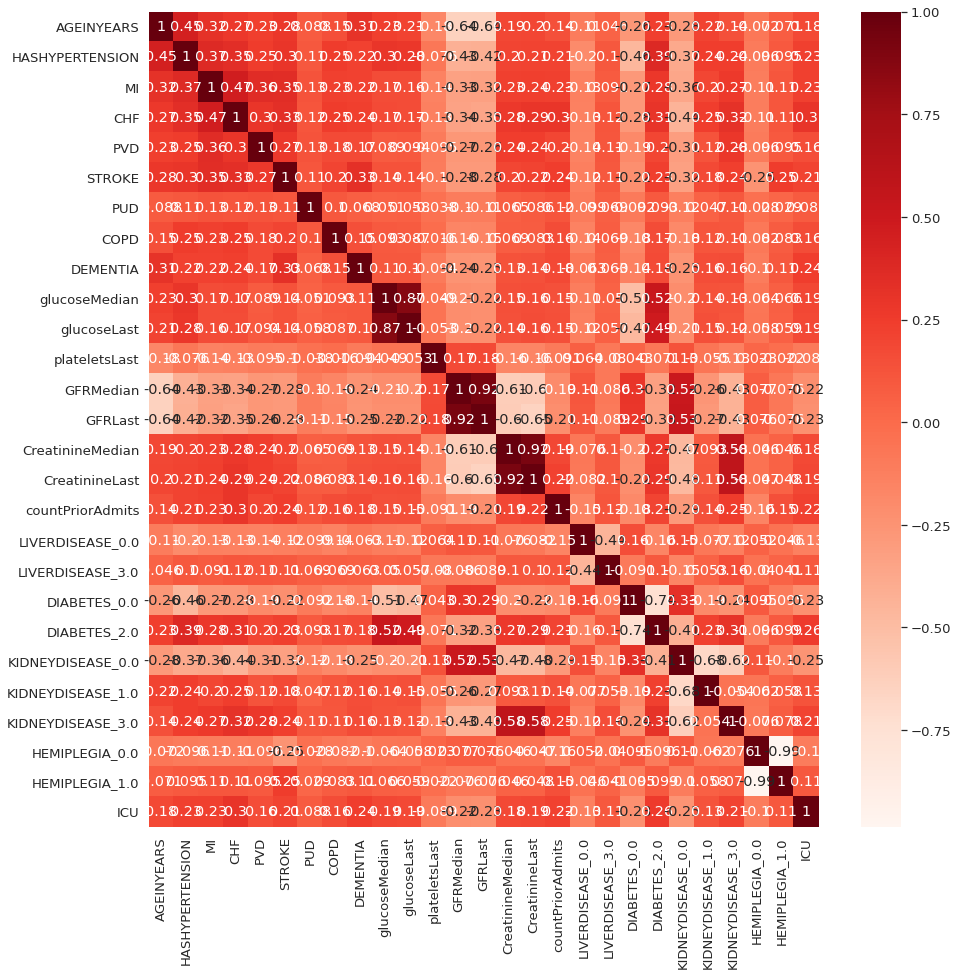

In [125]:
#Using Pearson Correlation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))

cor = X_train.loc[:,features_ANOVA].join(y_train.loc[:,Labels[3]]).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Principal Component Analysis

In [126]:
from sklearn.decomposition import PCA


n_PC = 30
pca = PCA(n_components=n_PC)

PC = []

for i in range(1,n_PC+1):
    PC.append(f'PC{i}')
    
training_noAge = X_train.drop(columns='AGEINYEARS')

principalComponents = pca.fit_transform(training_noAge)
principalDfTrain_noAge = pd.DataFrame(data = principalComponents,columns=PC)

principalComponents = pca.fit_transform(X_train)
principalDfTrain = pd.DataFrame(data = principalComponents,columns=PC)

testing_noAge = X_test.drop(columns='AGEINYEARS')

principalComponents = pca.fit_transform(X_test)
principalDfTest_noAge = pd.DataFrame(data = principalComponents,columns=PC)

principalComponents = pca.fit_transform(X_test)
principalDfTest = pd.DataFrame(data = principalComponents,columns=PC)

principalDfTrain

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-3.662569,0.573126,1.144062,0.248593,2.349706,0.511759,-0.755041,1.044043,0.928898,0.335138,...,1.106661,0.073111,-0.217577,-0.313579,0.159650,0.180232,-0.118953,-0.312995,0.124825,-0.289174
1,13.384916,0.153650,0.136950,0.306796,-0.394378,1.454245,-0.730672,-0.516757,-0.361892,0.079361,...,-0.027592,0.031930,-0.000536,-0.025147,-0.159147,0.213377,0.068605,0.029784,0.034450,0.008502
2,-37.690806,0.221044,-0.550422,0.472509,-2.090700,-0.836901,1.174187,-0.494726,-0.134993,-0.431092,...,-0.162027,0.018868,-0.028561,0.029637,-0.007948,-0.295556,-0.298153,0.441197,0.908190,-0.005181
3,-19.751133,1.930149,-0.461679,0.444867,-1.636696,-1.193259,1.771413,0.972679,-0.889013,-0.020361,...,0.018640,0.290166,0.201861,0.131661,0.584873,-0.172618,0.602936,0.006406,-0.322777,0.037104
4,10.380377,0.270558,-0.522198,0.971233,-0.754886,-0.252533,0.055844,0.126920,-0.501000,0.384395,...,0.066978,-0.076916,0.100603,-0.267519,0.042913,-0.307658,-0.078147,0.054087,-0.053181,-0.077719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,2.429074,-1.522533,-0.282649,-0.296269,0.603947,-0.146896,-0.561553,0.105424,-0.434552,0.009451,...,0.143648,-0.040655,0.054314,-0.023130,-0.040000,0.233193,-0.006181,-0.027879,0.013095,0.002850
13589,-1.703675,1.429100,-1.362642,1.111309,0.181305,0.297358,-0.428878,-0.716416,-0.554347,0.331563,...,0.126808,-0.098741,-0.187607,0.234396,-0.059897,0.163097,-0.064853,-0.021281,0.028420,0.049158
13590,21.388849,2.811974,4.277004,-0.454155,-0.945347,2.823202,-0.389145,-0.718788,0.933092,0.689072,...,-0.410510,-0.164386,-0.064936,-0.026380,-0.554926,0.003655,0.428933,0.205878,-0.106182,-0.082338
13591,5.347387,0.541098,0.348925,0.409867,0.375424,0.959573,1.115091,-0.031611,0.035827,-0.429867,...,0.718838,0.784167,-0.052931,0.180161,-0.401831,0.478991,0.290007,0.078866,0.110132,0.044577


In [127]:
TrainSetPCA = principalDfTrain.join(y_train)
TestSetPCA = principalDfTest.join(y_test)

TrainSetPCA_noAge = principalDfTrain_noAge.join(y_train)
TestSetPCA_noAge = principalDfTest_noAge.join(y_test)

path = os.path.join( os.getcwd(), '../..', 'data/preprocessed_BMED8813/processed data/' )
filename = path+'TrainSetPCA30_noAge.csv'
TrainSetPCA_noAge.to_csv(r''+filename,index=False)
filename = path+'TestSetPCA30_noAge.csv'
TestSetPCA_noAge.to_csv(r''+filename,index=False)

## Plotting explained variance

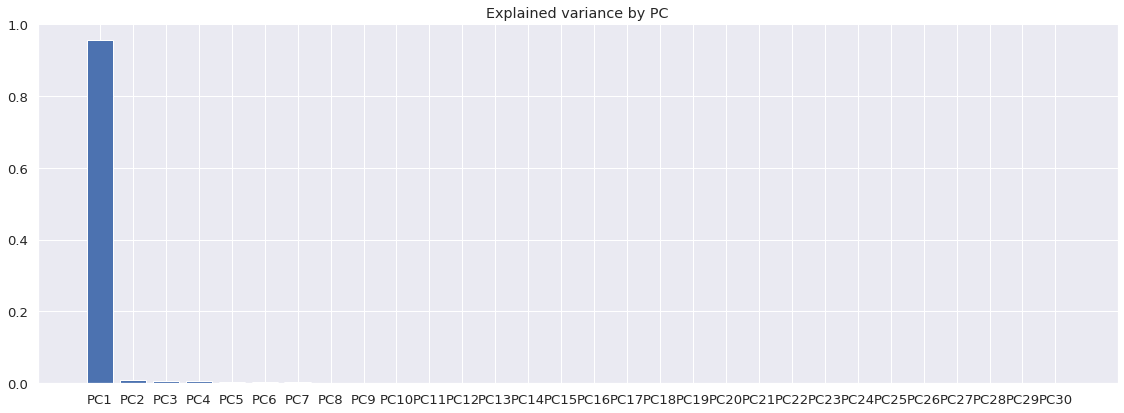

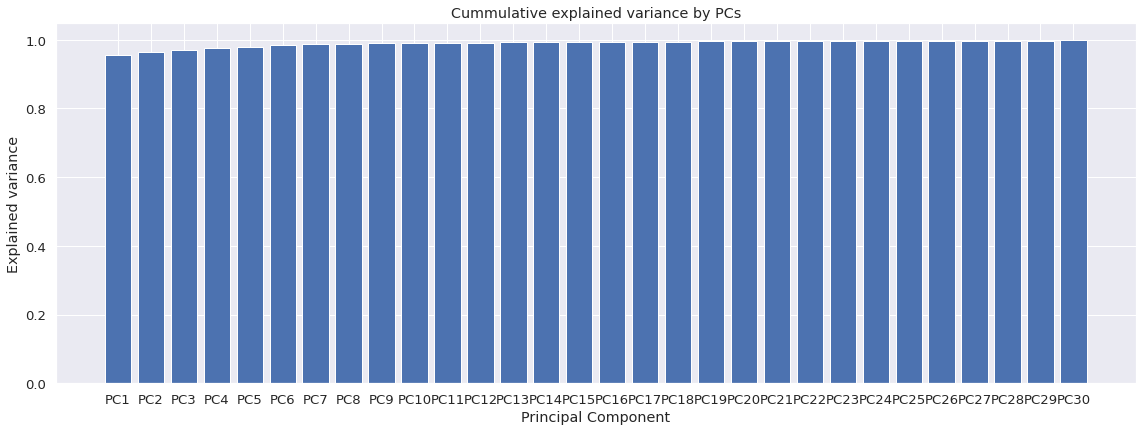

array([0.95415262, 0.96301687, 0.96966004, 0.97540161, 0.98014577,
       0.98388578, 0.98660406, 0.98793258, 0.98911972, 0.99008022,
       0.99090715, 0.99156726, 0.99219437, 0.99277612, 0.99327415,
       0.99374493, 0.99416075, 0.99453108, 0.99488537, 0.99523207,
       0.99556387, 0.99588337, 0.99617346, 0.99645992, 0.99672551,
       0.99696213, 0.99718642, 0.9974007 , 0.99760141, 0.99779302])

In [128]:
import matplotlib.pyplot as plt

pincipalComponents = pca.fit_transform(X_train)
#rincipalComponents = pca.fit_transform(training_noAge)
pca_evar = pca.explained_variance_ratio_
pca_cumvar = np.cumsum(pca_evar)

PC = []

for i in range(1,31):
    PC.append(f'PC{i}')

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])


ax.bar(PC,pca_evar)
plt.title('Explained variance by PC')
plt.show()

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(PC,pca_cumvar)
plt.title('Cummulative explained variance by PCs')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance')
plt.show()

pca_cumvar

## Plotting feature contributions to Principal Components

Text(63.49999999999997, 0.5, 'Feature')

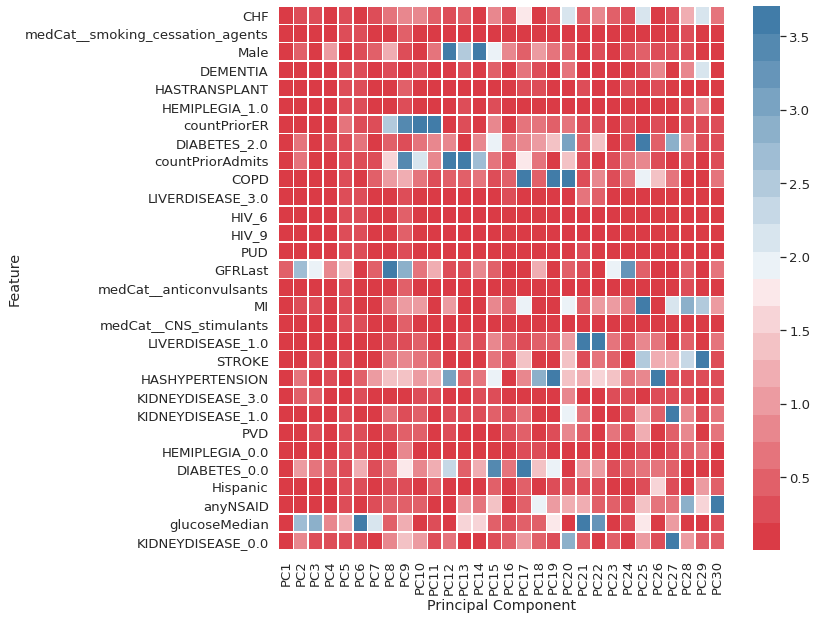

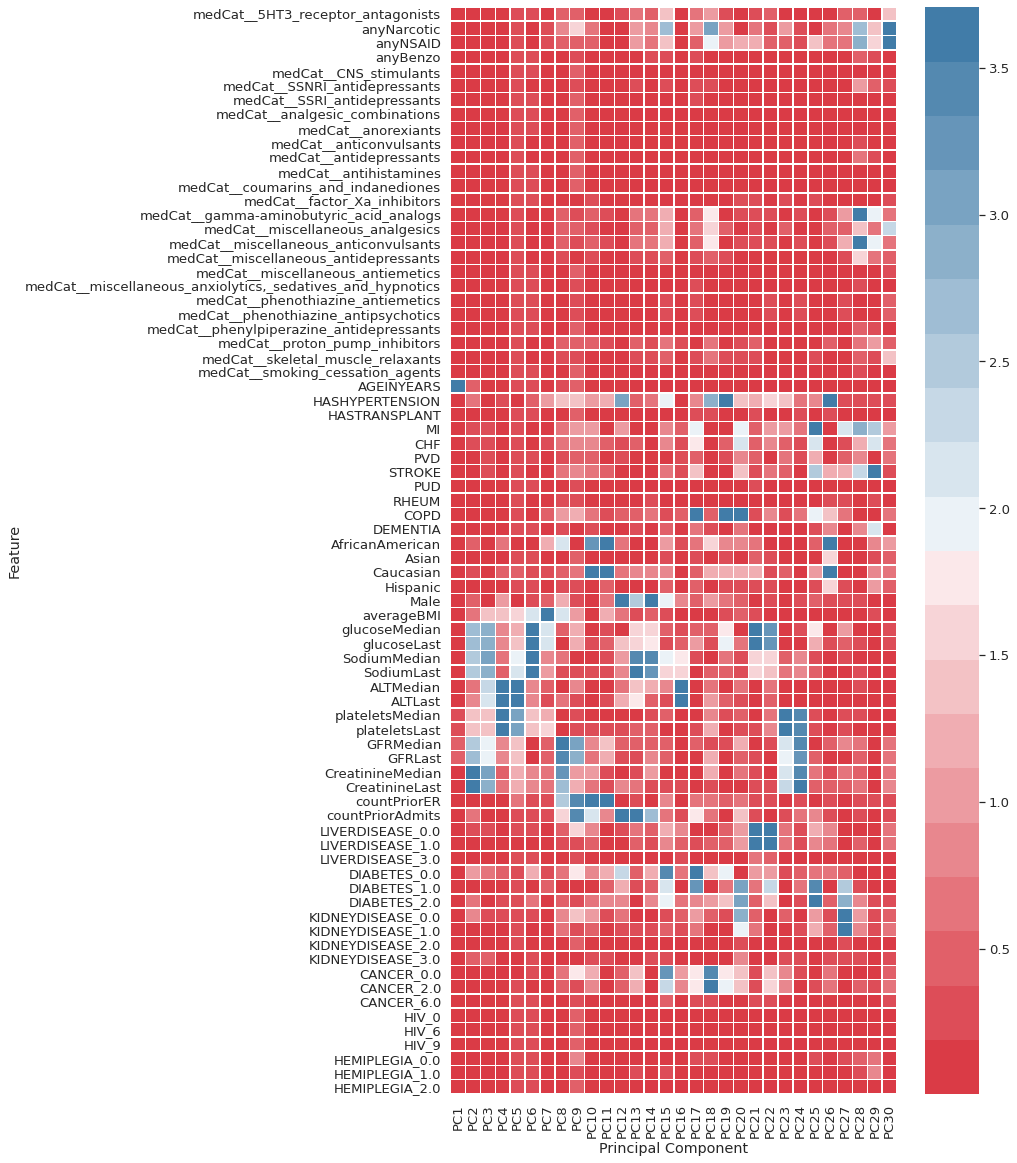

In [132]:
from scipy.stats import zscore
import seaborn as sns
feature_PCA_corr = pd.DataFrame(pca.components_,columns=X_train.columns,index = PC)

feature_PCA_corr = feature_PCA_corr.apply(zscore,axis=1,result_type='broadcast')
feature_PCA_corr = feature_PCA_corr.apply(np.abs,result_type='broadcast')
feature_PCA_corr

features_matlab = ['CHF','medCat__smoking_cessation_agents','Male','DEMENTIA',
'HASTRANSPLANT','HEMIPLEGIA_1.0','countPriorER','DIABETES_2.0',
'countPriorAdmits','COPD','LIVERDISEASE_3.0','HIV_6','HIV_9','PUD','GFRLast','medCat__anticonvulsants',
'MI','medCat__CNS_stimulants','LIVERDISEASE_1.0','STROKE','HASHYPERTENSION','KIDNEYDISEASE_3.0',
'KIDNEYDISEASE_1.0','PVD','HEMIPLEGIA_0.0','DIABETES_0.0','Hispanic','anyNSAID','glucoseMedian','KIDNEYDISEASE_0.0']

ax = plt.figure(figsize=(10,10)).gca()
sns.set(font_scale=1.2) 
colormap = sns.diverging_palette(10, 240, n=20)
ax = sns.heatmap(feature_PCA_corr.loc[:,features_matlab].T,cmap =colormap,linewidths=.5,robust=True,)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Feature')

ax2 = plt.figure(figsize=(10,20)).gca()
sns.set(font_scale=1.2) 
colormap = sns.diverging_palette(10, 240, n=20)
ax2 = sns.heatmap(feature_PCA_corr.T,cmap =colormap,linewidths=.5,robust=True,)
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Feature')

feature_PCA_corr